In [2]:
import pandas as pd
import numpy as np


In [8]:
sanakirja = {
    "id": [1, 2, 3, 4, 5],
    "ika": [203, 34, 75, 58, 44],
    "sukupuoli": ['N', 'M', 'M', 'N', 'M']
}

sanakirja

{'id': [1, 2, 3, 4, 5],
 'ika': [203, 34, 75, 58, 44],
 'sukupuoli': ['N', 'M', 'M', 'N', 'M']}

In [9]:
df = pd.DataFrame(sanakirja)

df

df['pituus'] = [158, 164, 170, 165, 161]
df


,id,ika,sukupuoli,pituus
0,1,203,N,158
1,2,34,M,164
2,3,75,M,170
3,4,58,N,165
4,5,44,M,161


In [2]:
df2 = pd.DataFrame({
    'kengannumero': [40, 45, 42, 41, 39],
    'paino': [60, 80, 75, 69, 12]
})
df2

,kengannumero,paino
0,40,60
1,45,80
2,42,75
3,41,69
4,39,12


In [ ]:
filter = df2[df2.kengannumero > 42] # same as df2["kengannumero"]
filter

,kengannumero,paino
1,45,80


In [10]:
df3 = pd.concat([df, df2],axis=1) #axix=0,ignore_index=True)
df3

,id,ika,sukupuoli,pituus,kengannumero,paino
0,1,203,N,158,40,60
1,2,34,M,164,45,80
2,3,75,M,170,42,75
3,4,58,N,165,41,69
4,5,44,M,161,39,12


In [ ]:
df3.loc[1] = [2,4,'M',164,45,888] #modify by row index
df3

In [11]:
df3.loc[len(df3.index)] = [6,64, 'M', 175, 43, 75] #add new row 
df3

,id,ika,sukupuoli,pituus,kengannumero,paino
0,1,203,N,158,40,60
1,2,34,M,164,45,80
2,3,75,M,170,42,75
3,4,58,N,165,41,69
4,5,44,M,161,39,12
5,6,64,M,175,43,75


In [12]:
df3.columns

Index(['id', 'ika', 'sukupuoli', 'pituus', 'kengannumero', 'paino'], dtype='object')

In [13]:
df3.index

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [14]:
df_series = pd.Series([7, 63, "M", 175, 43,75], index=df3.columns)
df_series

id                7
ika              63
sukupuoli         M
pituus          175
kengannumero     43
paino            75
dtype: object

In [15]:
apu_df = pd.DataFrame([df_series])
df4 = pd.concat([df3, apu_df], axis=0, ignore_index=True)
df4

,id,ika,sukupuoli,pituus,kengannumero,paino
0,1,203,N,158,40,60
1,2,34,M,164,45,80
2,3,75,M,170,42,75
3,4,58,N,165,41,69
4,5,44,M,161,39,12
5,6,64,M,175,43,75
6,7,63,M,175,43,75


In [16]:
df5 = pd.DataFrame({
    "id":[1,2,4],
    "syntymavuosi":[2002, 1998, 'kissa']
})

df5

,id,syntymavuosi
0,1,2002
1,2,1998
2,4,kissa


In [17]:
df6 = df4.merge(df5, on='id', how='left') #how='right', 'left', same with left join aj right join 
df6

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,203,N,158,40,60,2002
1,2,34,M,164,45,80,1998
2,3,75,M,170,42,75,NaN
3,4,58,N,165,41,69,kissa
4,5,44,M,161,39,12,NaN
5,6,64,M,175,43,75,NaN
6,7,63,M,175,43,75,NaN


In [ ]:
df6.shape #rivit ja sarakkeet

In [ ]:
df6.dtypes

In [ ]:
df6.info()

In [ ]:
df6.describe()

In [ ]:
df6.tail(3) #df6.head(3), df6.sample(3)

In [ ]:
df6['sukupuoli'].unique()

In [ ]:
df6['ika'].duplicated()

In [ ]:
df7 = df6[(df6['ika'] >= 200) & (df6['id'] > 0)]
df7

In [ ]:
df6['ika'] = df6['ika'] + 1

df

In [19]:
df6.loc[df6['sukupuoli'] == 'M','paino']

1    80
2    75
4    12
5    75
6    75
Name: paino, dtype: int64

In [ ]:
df6.loc[(df6['sukupuoli'] == 'M'), 'paino'] = df6.loc[(df6['sukupuoli'] == 'M'), 'paino'] + 2 # same with += 2
df6

In [ ]:
df8 = df6.drop(['ika', 'sukupuoli'], axis=1) #does not change org variable

df8

In [ ]:
indeksi = df6[df6['id'] == 6].index #df6 does not affected

df9 = df6.drop(indeksi)
df9

In [ ]:
df10 = df9.dropna()
df10

In [ ]:
df11 = df9.fillna('?') # ffill()
df11

In [ ]:
df6['syntymavuosi'] = 2025 - df6['ika']
df6

In [ ]:
df6['ika'].sort_values(ascending=False) # sort by ika

In [75]:
df6.sort_values(['sukupuoli', 'ika'], ascending=[False, True], ignore_index=True, inplace=True)
df6

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,4,59,N,165,41,69,1966
1,1,204,N,158,40,60,1821
2,2,5,M,164,45,896,2020
3,5,45,M,161,39,20,1980
4,7,64,M,175,43,83,1961
5,6,65,M,175,43,83,1960
6,3,76,M,170,42,83,1949


In [71]:
#!python -m pip install matplotlib< #same with run: python -m pip install matplotlib on command window

import matplotlib.pyplot as plt
import numpy as np



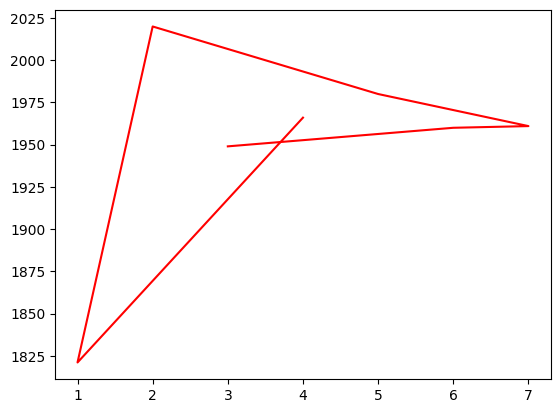

In [ ]:
x = np.array(df6['id']) #np.arange(1,8)
y = np.array(df6['syntymavuosi'])
#plt.bar(x,y), plt.scatter(x,y,)
plt.plot(x,y,'r') #r: red, color of the line, g: green, 
plt.show()

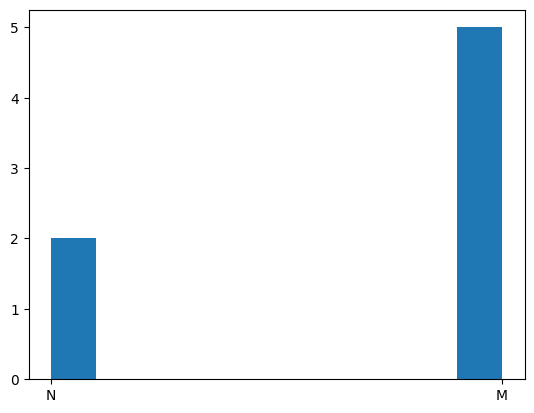

In [85]:
plt.hist(df6['sukupuoli'])
plt.show()

In [86]:
naiset = df6[df6['sukupuoli'] == 'N']['id'].count()
miehet = df6[df6['sukupuoli'] == 'M']['id'].count()

sukupuolet = [naiset, miehet]
sukupuolet

[np.int64(2), np.int64(5)]

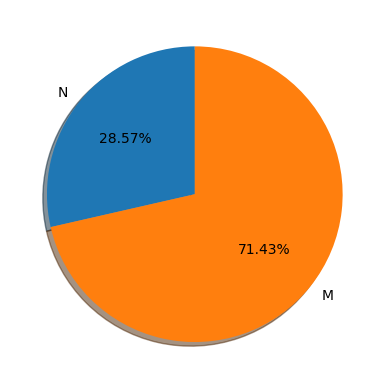

In [ ]:
y = np.array(sukupuolet)
labels = ['N', 'M']

#plt.pie(y, labels=labels)
plt.pie(y, labels=labels, startangle=90, autopct='%.2f%%',shadow=True)
plt.show()

In [93]:
df6.to_json('eka.json')

In [95]:
df6.to_csv('ek.csv', index=False)

In [96]:
df12 = pd.read_csv('ek.csv')
df12

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,4,59,N,165,41,69,1966
1,1,204,N,158,40,60,1821
2,2,5,M,164,45,896,2020
3,5,45,M,161,39,20,1980
4,7,64,M,175,43,83,1961
5,6,65,M,175,43,83,1960
6,3,76,M,170,42,83,1949


In [97]:
df13 = pd.read_json('eka.json')
df13

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,4,59,N,165,41,69,1966
1,1,204,N,158,40,60,1821
2,2,5,M,164,45,896,2020
3,5,45,M,161,39,20,1980
4,7,64,M,175,43,83,1961
5,6,65,M,175,43,83,1960
6,3,76,M,170,42,83,1949
